In [1]:
!sudo apt-get install -y fonts-nanum #코랩 한글 폰트 꺠짐 방지 폰트 설치
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,661 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and d

In [1]:
!pip install mxnet
!pip install gluonnlp
!pip install sentencepiece
!pip install transformers
!pip install torch

     |████████████████████████████████| 47.3 MB 1.2 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 344 kB 10.1 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp37-cp37m-linux_x86_64.whl size=595738 sha256=2762bde0e0d4af9d2b84295df5adcb19fdedb94266bf3b59a7329d5c3b28521a
  Stored in directory: /root/.cache/pip/wheels/be/b4/06/7f3fdfaf707e6b5e98b79c041e023acffbe395d78a527eae00
Successfully built gluonnlp
     |████████████████████████████████| 1.2 MB 7.9 MB/s 
     |████████████████████████████████| 3.4 MB 9.7 MB/s 
     |████████████████████████████████| 895 kB 69.9 MB/s 
     |████████████████████████████████| 67 kB 7.1 MB/s 
     |████████████████████████████████| 596 kB 75.4 MB/s 
     |████████████████████████████████| 3.3 MB 77.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# 한국어 출력
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath,size=9)
plt.rc('font',family='NanumBarunGothic')
%matplotlib inline

In [4]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-_3nf2z1g
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-_3nf2z1g
     |████████████████████████████████| 131 kB 9.7 MB/s 
     |████████████████████████████████| 4.5 MB 74.4 MB/s 
     |████████████████████████████████| 8.5 MB 83.8 MB/s 
     |████████████████████████████████| 79 kB 9.9 MB/s 
     |████████████████████████████████| 127 kB 73.8 MB/s 
  Created wheel for kobert: filename=kobert-0.2.3-py3-none-any.whl size=15449 sha256=9469f9faf03b84377f423c3e7770bd9f8dcb25b744bf05449600e43c76575be0
  Stored in directory: /tmp/pip-ephem-wheel-cache-apsq7enb/wheels/d3/68/ca/334747dfb038313b49cf71f84832a33372f3470d9ddfd051c0
Successfully built kobert
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not

In [5]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
from tqdm import tqdm, tqdm_notebook

from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [6]:
# headline 데이터 가져오기

df = pd.read_csv('/content/drive/MyDrive/final_project/final_df.csv',index_col=0)
df.reset_index(inplace=True)
del df['index']
df

,name,headline,date,change,token_mecab
0,삼성전자,"[TV] 재계 총수들, 일자리 창출과 투자 확대 강조",2012-01-02,1,TV 재계 총수 일자리 창출 투자 확대 강조
1,셀트리온,"코스닥, 새해 첫 거래일 소폭 오름세 지속",2012-01-02,0,코스닥 새해 거래일 소폭 오름세 지속
2,셀트리온,코스닥 새해 첫 거래일 소폭 오름세 지속,2012-01-02,0,코스닥 새해 거래일 소폭 오름세 지속
3,셀트리온,"코스닥, 개인·기관 '사자'에 상승 지속…저출산株 강세",2012-01-02,0,코스닥 개인 기관 사자 상승 지속 저출산 종목 강세
4,셀트리온,"코스피, 외인 '팔자'에 약세 전환…방향성 탐색",2012-01-02,0,코스피 외인 팔자 약세 전환 방향 탐색
...,...,...,...,...,...
233699,SK하이닉스,"""코로나 봉쇄로 삼성 시안공장 생산 줄여…메모리 공급사 주가에는 긍정적 영향""",2021-12-30,1,코로나 봉쇄 삼성 시안 공장 생산 메모리 공급 주가 긍정 영향
233700,SK하이닉스,"SK하이닉스, 인텔 낸드 1단계 인수",2021-12-30,1,SK 하이닉스 인텔 낸드 단계 인수
233701,SK하이닉스,"SK하이닉스, 특별성과급 300% 쏜다",2021-12-30,1,SK 하이닉스 특별
233702,셀트리온,"삼성바이오로직스-셀트리온, 바이오 대장주 희비",2021-12-30,0,삼성 바이오 로직스 트리 장주 희비


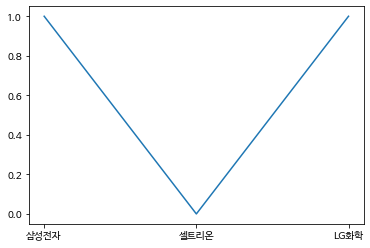

In [7]:
# 한국어 test
plt.plot(df['name'][:10],df['change'][:10])

In [8]:
# 정렬된 date에서 train과 test split 진행 (기준은 2020년 1월 1일)
df['date'] = pd.to_datetime(df['date'])
train = df[df['date'] < pd.to_datetime('2020-01-01')]
test = df[df['date'] >= pd.to_datetime('2020-01-01')]
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188530 entries, 0 to 188529
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   name         188530 non-null  object        
 1   headline     188530 non-null  object        
 2   date         188530 non-null  datetime64[ns]
 3   change       188530 non-null  int64         
 4   token_mecab  188501 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 8.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45174 entries, 188530 to 233703
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         45174 non-null  object        
 1   headline     45174 non-null  object        
 2   date         45174 non-null  datetime64[ns]
 3   change       45174 non-null  int64         
 4   token_mecab  45172 non-null  object        
dtypes: dateti

(None, None)

In [9]:
# mecab_token 제거
train.reset_index(inplace=True)
test.reset_index(inplace=True)
del train['index']
del test['index']

cols = ['headline','change']
train_data = train[cols]
test_data = test[cols]

In [10]:
print(train_data.shape)
print(test_data.shape)

(188530, 2)
(45174, 2)


In [11]:
## GPU
device = torch.device("cuda:0")
bertmodel, vocab = get_pytorch_kobert_model(cachedir=".cache")

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188530 entries, 0 to 188529
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   headline  188530 non-null  object
 1   change    188530 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ MB


## Kobert의 input 형식에 맞게 변환 진행

In [13]:
# train test tsv 파일로 변환
train_data.to_csv("./train_file.tsv", sep='\t')
test_data.to_csv("./test_file.tsv", sep='\t')

In [14]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair) 

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

## 2. 파라미터 설정하기
기계 학습을 훈련시킬 때 필요한 파라미터 설정  
- max_len : 텍스트 데이터 최대 길이
- num_epochs : 훈련 반복 횟수

In [15]:
# parameter 조절하기

max_len = 64 # 해당 길이를 초과하는 단어에 대해선 bert가 학습하지 않음
batch_size = 64
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate = 5e-5

In [16]:
# 기본 Bert tokenizer 사용
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [17]:
dataset_train = nlp.data.TSVDataset('./train_file.tsv',field_indices=[1,2], num_discard_samples=1)
dataset_test = nlp.data.TSVDataset('./test_file.tsv',field_indices=[1,2], num_discard_samples=1)


In [18]:
train_set = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
test_set = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

In [19]:
# pytorch용 dataloader 사용
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, num_workers=5)

In [20]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=2,
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [21]:
device = torch.device("cuda:0")

model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)
base_md = torch.load('/content/drive/MyDrive/final_project/kobert_v1.pt',map_location=device)
base_md.load_state_dict(model.state_dict())
base_md.eval()


BERTClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(8002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True

In [22]:
# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in base_md.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in base_md.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [23]:
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

In [24]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [25]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    base_md.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = base_md(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(base_md.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    base_md.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = base_md(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

  0%|          | 0/2946 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 0.6007956862449646 train acc 0.71875
epoch 1 batch id 201 loss 1.0127900838851929 train acc 0.5125155472636815
epoch 1 batch id 401 loss 0.6784058213233948 train acc 0.5096243765586035
epoch 1 batch id 601 loss 0.5772912502288818 train acc 0.5210326539101497
epoch 1 batch id 801 loss 1.0770617723464966 train acc 0.522959581772784
epoch 1 batch id 1001 loss 0.6079281568527222 train acc 0.517701048951049
epoch 1 batch id 1201 loss 0.7809015512466431 train acc 0.5170821190674438
epoch 1 batch id 1401 loss 0.7484915256500244 train acc 0.5175321199143469
epoch 1 batch id 1601 loss 0.8527514338493347 train acc 0.5158006714553404
epoch 1 batch id 1801 loss 0.7047443985939026 train acc 0.5139852859522488
epoch 1 batch id 2001 loss 0.6513628363609314 train acc 0.5107836706646677
epoch 1 batch id 2201 loss 0.7119611501693726 train acc 0.5091719672875965
epoch 1 batch id 2401 loss 0.6398428678512573 train acc 0.5104513744273219
epoch 1 batch id 2601 loss 0.6667863130569458

  0%|          | 0/706 [00:00<?, ?it/s]

epoch 1 test acc 0.485478307627741


  0%|          | 0/2946 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.7677026987075806 train acc 0.265625
epoch 2 batch id 201 loss 0.8496372699737549 train acc 0.5247978855721394
epoch 2 batch id 401 loss 0.6683453917503357 train acc 0.51410536159601
epoch 2 batch id 601 loss 0.6420103907585144 train acc 0.5249584026622296
epoch 2 batch id 801 loss 0.8908698558807373 train acc 0.5290652309612984
epoch 2 batch id 1001 loss 0.6311545372009277 train acc 0.5229614135864136
epoch 2 batch id 1201 loss 0.7492879033088684 train acc 0.5246279142381349
epoch 2 batch id 1401 loss 0.7994847893714905 train acc 0.5278372591006424
epoch 2 batch id 1601 loss 0.7226473093032837 train acc 0.5253552467207995
epoch 2 batch id 1801 loss 0.6858688592910767 train acc 0.523415810660744
epoch 2 batch id 2001 loss 0.6659367680549622 train acc 0.5200993253373314
epoch 2 batch id 2201 loss 0.7044914364814758 train acc 0.5165478759654702
epoch 2 batch id 2401 loss 0.6476958990097046 train acc 0.5178701582673886
epoch 2 batch id 2601 loss 0.6305904984474182

  0%|          | 0/706 [00:00<?, ?it/s]

epoch 2 test acc 0.485478307627741


  0%|          | 0/2946 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.7264687418937683 train acc 0.21875
epoch 3 batch id 201 loss 0.8438953161239624 train acc 0.5276741293532339
epoch 3 batch id 401 loss 0.6676228642463684 train acc 0.5210411471321695
epoch 3 batch id 601 loss 0.6636014580726624 train acc 0.5310420133111481
epoch 3 batch id 801 loss 0.8299811482429504 train acc 0.533103152309613
epoch 3 batch id 1001 loss 0.6671680212020874 train acc 0.5267701048951049
epoch 3 batch id 1201 loss 0.724764883518219 train acc 0.5286870316402997
epoch 3 batch id 1401 loss 0.7798551917076111 train acc 0.5326998572448252
epoch 3 batch id 1601 loss 0.6825621724128723 train acc 0.5304399594003748
epoch 3 batch id 1801 loss 0.696628749370575 train acc 0.5291331204886174
epoch 3 batch id 2001 loss 0.6673054695129395 train acc 0.5269552723638181
epoch 3 batch id 2201 loss 0.6939405798912048 train acc 0.523469445706497
epoch 3 batch id 2401 loss 0.6557056307792664 train acc 0.5241696168263223
epoch 3 batch id 2601 loss 0.6183367967605591 t

  0%|          | 0/706 [00:00<?, ?it/s]

epoch 3 test acc 0.514521692372259


  0%|          | 0/2946 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.683890163898468 train acc 0.671875
epoch 4 batch id 201 loss 0.8075338006019592 train acc 0.5251865671641791
epoch 4 batch id 401 loss 0.6732446551322937 train acc 0.5217814837905237
epoch 4 batch id 601 loss 0.6309453845024109 train acc 0.5339538269550749
epoch 4 batch id 801 loss 0.7916967868804932 train acc 0.5371800873907615
epoch 4 batch id 1001 loss 0.6625972390174866 train acc 0.5297514985014985
epoch 4 batch id 1201 loss 0.710421085357666 train acc 0.5319785595337219
epoch 4 batch id 1401 loss 0.7714409828186035 train acc 0.5354434332619558
epoch 4 batch id 1601 loss 0.6706305742263794 train acc 0.5335532479700187
epoch 4 batch id 1801 loss 0.6897282600402832 train acc 0.5322390338700722
epoch 4 batch id 2001 loss 0.6637693643569946 train acc 0.530359820089955
epoch 4 batch id 2201 loss 0.6958115100860596 train acc 0.5275230009086779
epoch 4 batch id 2401 loss 0.6675931811332703 train acc 0.528926749271137
epoch 4 batch id 2601 loss 0.6202532649040222 

  0%|          | 0/706 [00:00<?, ?it/s]

epoch 4 test acc 0.514521692372259


  0%|          | 0/2946 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.659470796585083 train acc 0.828125
epoch 5 batch id 201 loss 0.7617782354354858 train acc 0.5434546019900498
epoch 5 batch id 401 loss 0.6724104285240173 train acc 0.5321072319201995
epoch 5 batch id 601 loss 0.6169108748435974 train acc 0.5406613976705491
epoch 5 batch id 801 loss 0.766106367111206 train acc 0.5425639825218477
epoch 5 batch id 1001 loss 0.6524571776390076 train acc 0.5350430819180819
epoch 5 batch id 1201 loss 0.7136406898498535 train acc 0.5364670066611157
epoch 5 batch id 1401 loss 0.7356337904930115 train acc 0.5393580478229836
epoch 5 batch id 1601 loss 0.6554582118988037 train acc 0.5369202841973766
epoch 5 batch id 1801 loss 0.6900632977485657 train acc 0.5353362715158245
epoch 5 batch id 2001 loss 0.6502112150192261 train acc 0.5331631059470265
epoch 5 batch id 2201 loss 0.7200378179550171 train acc 0.5299792707860064
epoch 5 batch id 2401 loss 0.6660130620002747 train acc 0.5316014160766347
epoch 5 batch id 2601 loss 0.625223875045776

  0%|          | 0/706 [00:00<?, ?it/s]

epoch 5 test acc 0.514521692372259


In [26]:
torch.save(model,'/content/drive/MyDrive/final_project/kobert_v2.pt')